<a href="https://colab.research.google.com/github/ufsm-barriquello/Protocolos_IEC61850/blob/master/plot_sv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Libray setup


In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# git load
!git clone https://github.com/ufsm-barriquello/Protocolos_IEC61850.git

# Read and parse CSV data

In [ ]:
def readcsv(filename):
    """Read and parse Wireshark SV-CSV data"""
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=';')
        data = []
        for row in spamreader:
            data.append(row[0].replace('"', '').split(','))

    # Unpack data into a dictionary
    parsedata = dict((k, []) for k in data[0])
    values = ['IA', 'IB', 'IC', 'IN', 'VA', 'VB', 'VC', 'VN']
    parsedata['value'] = dict((k, []) for k in values)

    # Parse Wireshark CSV collumn data
    for item in data[1:]:

        parsedata['No.'].append(int(item[0]))
        parsedata['Time'].append(float(item[1]))
        parsedata['Source'].append(item[2])
        parsedata['Destination'].append(item[3])
        parsedata['Protocol'].append(item[4])
        parsedata['Length'].append(item[5])
        parsedata['Time delta from previous displayed frame'].append(
            float(item[6]))
        parsedata['smpCnt'].append(int(item[7]))
        if item[8] == 'global':
            smpsynch = 2
        elif item[8] == 'local':
            smpsynch = 1
        else:
            smpsynch = 0
        parsedata['smpSynch'].append(int(smpsynch))
        for key, val in zip(values, item[9:17]):
            parsedata['value'][key].append(float(val))

    return parsedata

# Plots

In [ ]:
def plot(dictdata):
    """Plot SV data"""
    fig, ax = plt.subplots(3,1, constrained_layout=True)

    plt.figure(1)
    plt.suptitle('Merging Unit', fontsize=18, fontweight='bold')
    plt.legend(loc='upper right', fontsize=14)

    ax[0].set_ylabel('IA')
    ax[0].set_xlabel('Time')
    ax[0].set_title('IA (A Primary)', fontsize=12)
    ax[0].plot(dictdata['Time'], np.multiply(dictdata['value']['IA'],0.001), '-*', color='blue')

    ax[1].set_ylabel('SmpCnt')
    ax[1].set_xlabel('Time')
    ax[1].set_title('smpCnt',  fontsize=12)
    ax[1].plot(dictdata['Time'], dictdata['smpCnt'], '-', color='red')

    ax[2].set_ylabel('smpSynch')
    ax[2].set_xlabel('Time')
    ax[2].set_title('smpSynch',  fontsize=12)
    ax[2].plot(dictdata['Time'], dictdata['smpSynch'], '-', color='red')

    plt.show()

Normal_traffic_NIC.csv


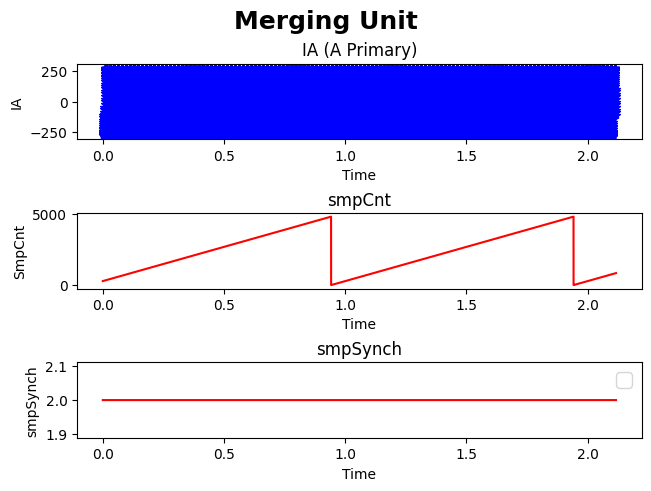

In [39]:
# Load data and plot

csv_file = './Protocolos_IEC61850/SV_normal.csv'

print('Normal_traffic_NIC.csv')
DATA = readcsv(csv_file)
plot(DATA)